In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

In [17]:
# link capacity in Gbit/s
C = 10 * (10**9)
# transmission time of each packet in µs
tau = 5 * (10**(-6)) 
# input file size in TB
Lf = 4 * (10**12) 
# output file size in TB
Lo = 4 * (10**12) 
# expected time the server takes to process a packet in seconds
E_X = 8 * 3600 
# fixed processing time in seconds
T_0 = 30 
# protocol overhead factor
xi = 0.1 
# arrival rate of packets
f = 48/1500 
# switches
n = 64 

Con `n = 64` e `100` server da raggiungere, si può determinare in quale pod si trovano i server e quanti hops occorrono per raggiungerli. 

- Ogni pod ha `n = 64` server e `n` switch, quindi contiene `n/2 = 32` server.
- Per raggiungere 100 server, quindi, serviranno almeno 4 pod (32 x 4 = 128 server).
- Poiché ogni pod ha `(n/2)² = 1024` collegamenti al livello centrale, e ci sono `n/2 = 32` pod per ogni switch nel livello centrale, ci sono in totale `1024 x 32 = 32768` collegamenti tra i pod e il livello centrale.
- Il livello centrale contiene `(n/2)² = 1024` switch, quindi ci sono `1024/4 = 256` switch che possono essere attraversati per raggiungere un server in un pod diverso da quello di partenza.
- In ogni pod, un server può essere raggiunto direttamente dallo switch di bordo a cui è connesso (1 hop), poi da uno switch di aggregazione (2 hops), e infine dal livello centrale (3 hops). Quindi, per raggiungere un server in un pod diverso da quello di partenza, sono necessari almeno 3 hops tra gli switch di diversi livelli. 
- In totale, per raggiungere 100 server in pod diversi, sono necessari almeno `3 x 4 = 12` hops.

In [18]:
N = 100
hops = math.ceil(N / (n/2))*3
hops

12

In [19]:
def compute_TCP_connection(h):
    T_i = 2 * tau * h
    theta_i = C * (1/T_i) / np.sum(1/T_i)
    return theta_i

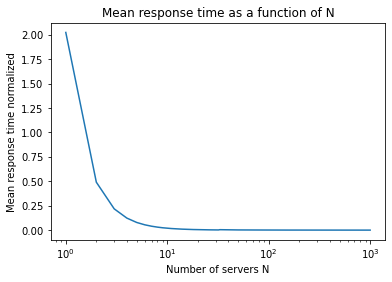

In [66]:
def compute_mean_response_time(N):
    hops = range(1, math.ceil(N / (n/2))*3)
    throughputs = [compute_TCP_connection(h) for h in hops]
    Xi = E_X/N
    Lf_i = Lf / N
    Lo_i = random.uniform(0, 2*(Lo/N))
    times = []
    for theta_i in throughputs:
     time_input = Lf_i / (theta_i * N) # total time the server takes to process all incoming data
     time_output = Lo_i / (theta_i * N) # total time the server takes to process all outgoing data
     times.append(T_0 + Xi + time_input + time_output) 

    return sum(times)/N

N_values = range(1, 1001) # ! mettere 10001
mean_response_time = [compute_mean_response_time(N) for N in N_values]
#ER_baseline is the response time when only server A is used, N = 1
ER_baseline = T_0 + E_X + Lf / (compute_TCP_connection(1) * N_values[0]) + Lo / (compute_TCP_connection(1) * N_values[0]) 
mean_response_time_norm = [ER / ER_baseline for ER in mean_response_time]

plt.plot(N_values, mean_response_time_norm)
plt.xlabel('Number of servers N')
plt.ylabel('Mean response time normalized')
plt.title('Mean response time as a function of N')
plt.xscale('log')
plt.show()

In [31]:
def g_ER(K,p): #an ars is included with probability p independently of any other arc
    G_p = nx.erdos_renyi_graph(K, p)
    return(G_p)
def g_r(K,r): # K>r>=3 AND Kr is EVEN
    G_r = nx.random_regular_graph(r,K)  
    return(G_r)

20
36


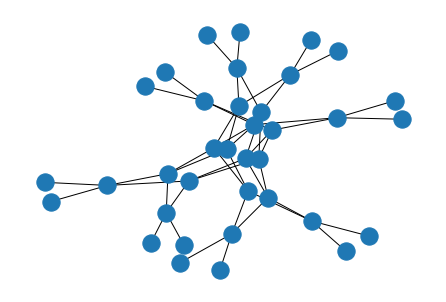

In [68]:
from fnss.topologies import fat_tree_topology
import networkx as nx

# Build a Fat-Tree topology with n=4
ft = fat_tree_topology(4)

# Convert it to a NetworkX graph
G = nx.Graph(ft)
nx.draw(G)

print(ft.number_of_switches())
print(ft.number_of_nodes())
